<a href="https://colab.research.google.com/github/Sagaust/DH-Computational-Methodologies/blob/main/Augustine_Translate_products_catalogue_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 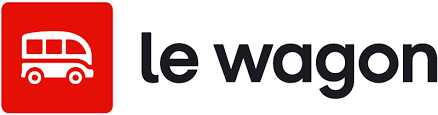

### 1) Download and import [`gwz_product_catalogue.json`](https://drive.google.com/file/d/1ibcWpw_eh0oI8lvccIHwnSrFgqTViN8G/view?usp=sharing) to colab.

Execute code below to download and save it to your drive

In [1]:
!gdown '1ibcWpw_eh0oI8lvccIHwnSrFgqTViN8G'

Downloading...
From: https://drive.google.com/uc?id=1ibcWpw_eh0oI8lvccIHwnSrFgqTViN8G
To: /content/gwz_products_catalogue.json
100% 15.5k/15.5k [00:00<00:00, 34.1MB/s]


load data to `gwz_products` variable

In [2]:
import json
with open('/content/gwz_products_catalogue.json') as json_file:
    gwz_products = json.load(json_file)

### 2) How is data structured in this file ?

In [3]:
print(type(gwz_products))


<class 'dict'>


In [10]:
# category
category = gwz_products.keys()
print(category)




dict_keys(['Beauté & Hygiène', 'Boisson', 'Bébé & Enfant', 'Epicerie salée', 'Epicerie sucrée', 'Extérieur', 'Frais', 'Maison', 'Mode, Sports, Loisirs, Livres', 'Santé & Bien-être'])


In [7]:
# Checking the type of the data under the 'Beauté & Hygiène' category
beauty_products_type = type(gwz_products['Beauté & Hygiène'])
print(beauty_products_type)





<class 'dict'>


In [11]:
# Sub Category
sub_categories = gwz_products['Beauté & Hygiène'].keys()
print(sub_categories)


dict_keys(['Cosmétique maison DIY', 'Douche et Bain', 'Epilation', 'Hygiène', 'Maquillage', 'Soins Homme', 'Soins Solaires', 'Soins des cheveux', 'Soins du corps', 'Soins du visage', "Soins à l'Argile"])


In [12]:
soins_du_corps_type = type(gwz_products['Beauté & Hygiène']['Soins du corps'])
print(soins_du_corps_type)

<class 'list'>


In [17]:
#Products
products = gwz_products['Beauté & Hygiène']['Soins du corps']
print(products)

['Coffrets corps', 'Eau de toilette et Parfum', 'Gommage', 'Huiles végétales et sèches', 'Laits pour le corps', 'Minceur et fermeté', 'Soins mains et ongles', 'Soins pieds et jambes']


Main categories are keys, sub categories as sub keys and products are stored in lists.

### 3) Execute following command to download `googletrans` which is a translating Python library developped by Google.

In [18]:
!pip3 install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=34753d7da353c67f53eb76f60919596001a518b97fdef0a093e930e70cef699a
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

### 4) Execute the following code to use Translator from googletrans.

What is the type of translator variable? What part of the course does this make you think of?

In [19]:
from googletrans import Translator

translator = Translator()

`translator` is an object with attributes and methods !

### 5) Translation
Read the [following documentation](https://pypi.org/project/googletrans/) find out how to translate "Je découvre python et j'adore déjà ça !" in english with code.

In [20]:
# The text to be translated
text_to_translate = "Je découvre python et j'adore déjà ça !"

# Performing the translation
translated_text = translator.translate(text_to_translate, src='fr', dest='en')

# Extracting the translated text
print(translated_text.text)

I'm discovering python and I already love it!


### 6) Create a Python function that takes a string as input and translator variable and returns the translation.

Test your function

In [21]:
def translate_text(text, translator, src='fr', dest='en'):

    try:
        translated = translator.translate(text, src=src, dest=dest)
        return translated.text
    except Exception as e:
        return f"An error occurred: {e}"

# Test
translator = Translator()
translated_text = translate_text("Je découvre python et j'adore déjà ça !", translator)
print(translated_text)


I'm discovering python and I already love it!


### 7) We will create a translated version of the json file you uploaded.

Create a new empty dictionnary and iterate over all keys, sub keys and products and translate them. Keep same data structure.

In [23]:
gwz_products_translated = {}

# iterate over keys
for key in gwz_products:
  translated_key = translate_text(key, translator)

    # Initialize sub dictionary
  gwz_products_translated[translated_key] = {}

    # Check if the value is a dictionary (for sub keys)
  if isinstance(gwz_products[key], dict):
        for sub_key in gwz_products[key]:
            # Translate sub key
            translated_sub_key = translate_text(sub_key, translator)

            # Initialize list for products
            gwz_products_translated[translated_key][translated_sub_key] = []

            # Check if the sub-value is a list (for products)
            if isinstance(gwz_products[key][sub_key], list):
                for product in gwz_products[key][sub_key]:
                    # Translate product
                    translated_product = translate_text(product, translator)

                    # Add translated product
                    gwz_products_translated[translated_key][translated_sub_key].append(translated_product)




### 8) Check the results

In [24]:
print(gwz_products_translated)


{'Beauty & Hygiene': {'DIY home cosmetics': ['Homemade cosmetic recipes', 'Utensil, container DIY'], 'Shower and Bath': ['Bath brush and accessory', 'Pebbles and bath salts', 'Shower gel', 'Soap', 'Liquid soap'], 'Hair removal': ['Depilatory waxes', 'Hair removal creams', 'Hair removal care'], 'Hygiene': ['Q-tips', 'Adult diapers, incontinence', 'Menstrual cups', 'Menstrual panties', 'Deodorants', 'Konjac sponges', 'Intimate gel', 'Handkerchiefs', 'Toilet paper', 'Towels and panty liners', 'Dental care', 'Ecological tampons'], 'Makeup': ['Complexion', 'The lips', 'Nails', 'The eyes', 'Brushes and accessories'], 'Men’s Care': ['Deodorants and eau de toilette', 'Safety razor, accessories', "Men's facial care", 'Beard Care', 'Shaving care'], 'Sun Care': ['Self-tanners', 'Baby and child sunscreens', 'Body sun creams', 'Tinted sunscreens', 'Facial sun creams', 'Monoi'], 'hair care': ['Natural colors', 'Styling gel and cream', '2 in 1 shower shampoo', 'Shampoo by hair type', 'Treatment shamp

# Congratulations you made it ! 🥳

### 9) Covert it into a DataFrame


The translated products need to be reviewed by the product team. Unfortunatly, product team doesn't know how to read json files.

Indeed some words are mistranslated like **"bouillottes" **which mean ***"hot water bottles".*** 😅

They want a csv file with three columns : **category**, **sub_category** and **product**.

### Create this DataFrame.

*hint : start by creating a list of dictionnaries, each dictionnary with three keys (category, sub_category, product). Transform this list to a DataFrame and finally save it to csv format.*

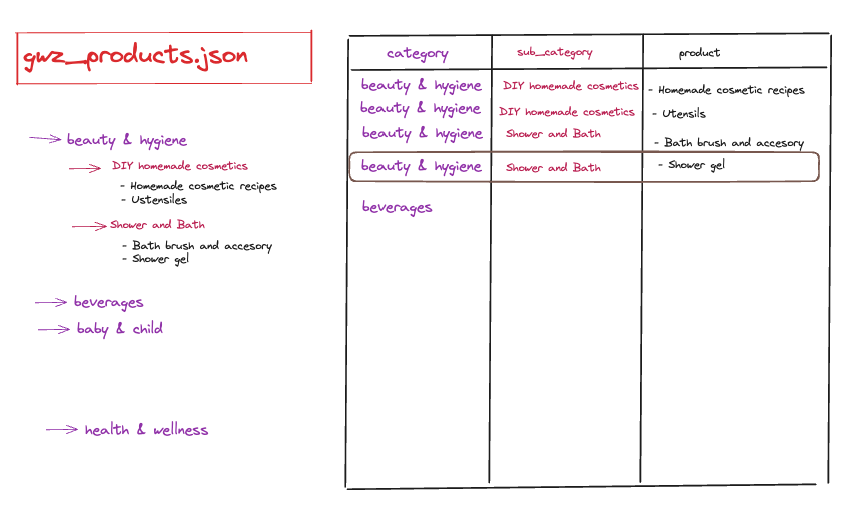

In [25]:
import pandas as pd

# Flatten the dictionary into a list of dictionaries
rows = []
for category, sub_categories in gwz_products_translated.items():
    for sub_category, products in sub_categories.items():
        for product in products:
            rows.append({
                "category": category,
                "sub_category": sub_category,
                "product": product
            })

# Convert to DataFrame
df = pd.DataFrame(rows)


In [26]:
# Exporting the DataFrame to a CSV file in the current working directory
df.to_csv('/content/gwz_products_translated.csv', index=False)